# Cleaning and Analyzing Employee Exit Survey Data

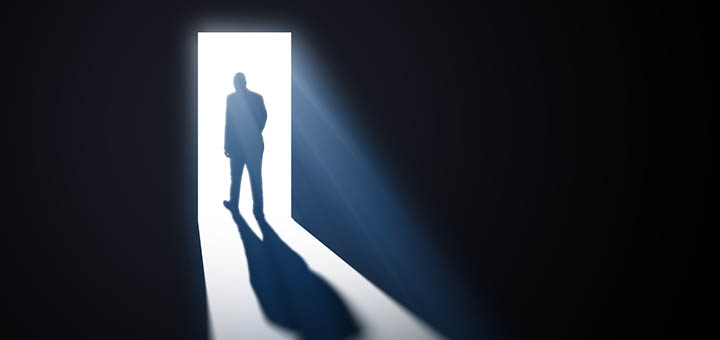

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cleaning-and-Analyzing-Employee-Exit-Survey-Data" data-toc-modified-id="Cleaning-and-Analyzing-Employee-Exit-Survey-Data-2">Cleaning and Analyzing Employee Exit Survey Data</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Findings" data-toc-modified-id="Findings-2.1.1">Findings</a></span></li></ul></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified-id="Initial-Data-Exploration-2.2">Initial Data Exploration</a></span><ul class="toc-item"><li><span><a href="#The-DETE-Dataset" data-toc-modified-id="The-DETE-Dataset-2.2.1">The DETE Dataset</a></span></li><li><span><a href="#The-TAFE-Dataset" data-toc-modified-id="The-TAFE-Dataset-2.2.2">The TAFE Dataset</a></span></li><li><span><a href="#Actions-to-Take" data-toc-modified-id="Actions-to-Take-2.2.3">Actions to Take</a></span></li></ul></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-2.3">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Removing-Unnecessary-Columns" data-toc-modified-id="Removing-Unnecessary-Columns-2.3.1">Removing Unnecessary Columns</a></span></li><li><span><a href="#Standardizing-Column-Names" data-toc-modified-id="Standardizing-Column-Names-2.3.2">Standardizing Column Names</a></span></li><li><span><a href="#Isolating-Employee-Resignations" data-toc-modified-id="Isolating-Employee-Resignations-2.3.3">Isolating Employee Resignations</a></span></li><li><span><a href="#Evaluating-Dates" data-toc-modified-id="Evaluating-Dates-2.3.4">Evaluating Dates</a></span></li><li><span><a href="#Years-of-Service" data-toc-modified-id="Years-of-Service-2.3.5">Years of Service</a></span></li><li><span><a href="#Targeting-Employee-Dissatisfaction" data-toc-modified-id="Targeting-Employee-Dissatisfaction-2.3.6">Targeting Employee Dissatisfaction</a></span></li><li><span><a href="#Combining-the-Datasets" data-toc-modified-id="Combining-the-Datasets-2.3.7">Combining the Datasets</a></span></li><li><span><a href="#Cleaning-the-Institute-Service-Column" data-toc-modified-id="Cleaning-the-Institute-Service-Column-2.3.8">Cleaning the Institute Service Column</a></span></li><li><span><a href="#Final-Cleaning-of-dissatisfied-Column" data-toc-modified-id="Final-Cleaning-of-dissatisfied-Column-2.3.9">Final Cleaning of dissatisfied Column</a></span></li></ul></li><li><span><a href="#Analysis-of-Service-and-Satisfaction-Data" data-toc-modified-id="Analysis-of-Service-and-Satisfaction-Data-2.4">Analysis of Service and Satisfaction Data</a></span></li><li><span><a href="#Analysis-of-Age-Group-and-Satisfaction-Columns" data-toc-modified-id="Analysis-of-Age-Group-and-Satisfaction-Columns-2.5">Analysis of Age Group and Satisfaction Columns</a></span><ul class="toc-item"><li><span><a href="#Cleaning-the-Age-Column" data-toc-modified-id="Cleaning-the-Age-Column-2.5.1">Cleaning the Age Column</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-2.5.2">Analysis</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.6">Conclusion</a></span></li></ul></li></ul></div>

## Introduction
In this project we will clean and analyze the results of employee exit surveys from the Department of Education, Training and Employement (DETE) and the Technical and Further Education Institute (TAFE) in Queensland Australia. The survey data can be downloaded [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

Our stakeholders want to know the following:
* Are employees who worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there for longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The datasets from each organization live in separate csv files but will be analyzed together. 

Learning Objective: clean and analyze data using vectorized pandas aggregation, transformation, string manipulation, and missing/duplicate data methods.

### Findings

Through this analysis we discovered that employees have a high overall incidence of leaving due to some dissatisfaction in the workplace, around 38% of all cases leave with dissatisfaction being at least a contributing factor in their decision. 

When we look at length of time that employees were with the organization, we see that highly experienced and veteran level employees, when they do decide to leave, have a higher tendency to leave due to some degree of dissatisfaction, an additional 16-20%, when compared with their new and experienced counterparts. 

Looking at age groups, Baby Boomers, Gen X, and Millenials had a comparable workplace dissatisfaction causalities, however Gen Z was ~10% less likely than these groups to name workplace dissatisfaction as a contributing factor towards their departure.

## Initial Data Exploration

In [1]:
# read in analysis libraries
import pandas as pd
import numpy as np

# read in datasets
dete = pd.read_csv('dete_survey.csv', na_values = 'Not Stated') # change string values to NULL types 
tafe = pd.read_csv('tafe_survey.csv')
# format the notebook so we can see all columns
pd.set_option('display.max_columns', 1000)

### The DETE Dataset

In [2]:
dete.info()
dete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


The DETE dataset is composed of 822 rows of survey response data and 56 columns representing the questions asked. There is a combination integer, object and boolean data types. The data has a high degree of completeness, though there are certain columns where null values are more present.

The columnar data can be categorized into demographic/positional, reason for/contributing factors towards departure, and attitude towards their workplace.

### The TAFE Dataset

In [3]:
tafe.info()
tafe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

The TAFE dataset is composed of 702 rows of survey responses and 72 columns of survey questions. The dataset is primarily composed of object datatypes with just two float values. There is significant presence of null values throughout.

This dataset is more explicit in their question categorization than the previous, similarly there are demographic/positinoal, reason for and contributing factors towards departure, attitudinal towards the institute and team/work unit, and onboarding/induction information. 

### Actions to Take

* Remove columns that do not contribute towards the analysis goals or lack a presence in both datasets
* Unify column names between datasets and change them to snake case
* Normalize the data so that they share similar types, values, and definitions between equivalent columns
* Decide what to do with missing data
* Tidy the datasets by reshaping the columns

## Data Cleaning
### Removing Unnecessary Columns

In [4]:
dete_updated = dete.drop(dete.columns[28:49], axis = 1)
dete_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [5]:
tafe_updated = tafe.drop(tafe.columns[18:66], axis = 1)
tafe_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 24 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   Record ID                                                                  702 non-null    float64
 1   Institute                                                                  702 non-null    object 
 2   WorkArea                                                                   702 non-null    object 
 3   CESSATION YEAR                                                             695 non-null    float64
 4   Reason for ceasing employment                                              701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector                          437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector        

The dataset is simplified to keep only those columns that align with our primary goals. For this analysis we will not be interested in attitudinal and tertiary demographic factors, but will focus on factors that contributed to departure, length of tenure, and age.

### Standardizing Column Names

In [6]:
# clean the dete column names
dete_updated.columns = dete_updated.columns.str.replace(' ','_').str.lower().str.strip()
dete_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
# create a mapping dictionary for tafe column names
mapping = {'Record ID': 'id', 'Reason for ceasing employment': 'separationtype', 'CESSATION YEAR': 'cease_date', 'Gender. What is your Gender?': 'gender', 'Employment Type. Employment Type': 'employment_status', 'CurrentAge. Current Age': 'age', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_current'}

# rename tafe columns
tafe_updated = tafe_updated.rename(mapping, axis = 1)

tafe_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_current
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,-,-,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We first standardized the columns in DETE so we have a target names that we can share between the datasets. Next, we isolated columns in the TAFE dataset that we know will be useful in our final analysis and renamed them to match those in DETE.

### Isolating Employee Resignations

In [8]:
# create series that pulls the separation type column
dete_sep = dete_updated['separationtype']
tafe_sep = tafe_updated['separationtype']

# frequency table of resignation type
print(dete_sep.value_counts(dropna = False))
print('\n')
print(tafe_sep.value_counts(dropna=False))

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


In [9]:
# create regex pattern to look for Resignation
resignation_regex = r'Resignation'
# create a bool looking for strings containing regex pattern
resignation_bool = dete_updated['separationtype'].str.contains(resignation_regex)

# create dataframe that contains only resignation separation types
dete_resignations = dete_updated.copy()[resignation_bool]

# check separation type to confirm
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [10]:
# create dataframe that only contains resignation seperationtype in TAFE
tafe_resignations = tafe_updated.copy()[tafe_updated['separationtype'] == 'Resignation']

# confirm change
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

The goal of our analysis is to uncover reasons that employees are leaving the company due to some sort of dissatisfaction. Above, we went through the process of creating a new dataframe that isolates survey responses that have a **seperationtype** equal to a resignation, which are the values aligned with our goal.  

 ### Evaluating Dates

In [11]:
# create series of start and cease dates in DETE 
dete_end = dete_resignations['cease_date'].value_counts(dropna=False)
dete_start = dete_resignations['dete_start_date'].value_counts().sort_index(ascending=True)
print(dete_start)
print(dete_end)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64


In [12]:
# create pattern for undesirable parts of date
m_year_pattern = r'([0-1][0-9]/)'
#replace that part of the strings with nothing and convert to float
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.replace(m_year_pattern,'').str.strip().astype(float)
# check that we were successful
print(dete_resignations['cease_date'].value_counts(dropna=False))

2013.0    146
2012.0    129
2014.0     22
NaN        11
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


In [13]:
# create series that evaluates the end dates in tafe
tafe_end= tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=True)
print(tafe_end)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64


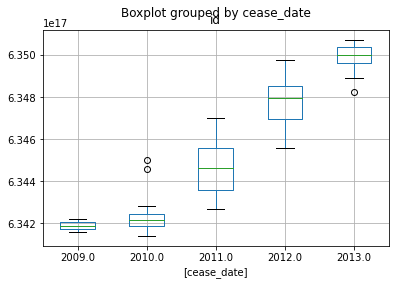

In [14]:
import matplotlib as plt
boxplot = tafe_resignations.boxplot(by = 'cease_date')

Above we evaluated start and end date datapoints and found that the data was in mostly good shape. We did have to clean DETE's cease date so that only the year remained. 

The TAFE dataset does not have a start date, however there is a years of service column that we can use for the next steps. Above we saw that there are NA values  that will affect our ability to create a full dataset, but the number of NA's, being small, will allow us to drop these rows.

### Years of Service 

In [15]:
# create a years of service object
dete_service = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
# add a new column to the dete dataframe
dete_resignations['institute_service'] = dete_service

dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

The goal of our analysis is to evaluate the cause of a short tenure within the organizations. The **institute_service** in the TAFE dataframe is the difference between the start and end, and will be what we will use to isolate instances where the time was very short.

Since this metric does not exist in DETE, we created an **institute_service** column using the start and end dates we already have. 

### Targeting Employee Dissatisfaction

In [16]:
tafe_resignations.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_current
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,-,-,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,-,-,-,-,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,-,-,-,-,-,Other,-,Career Move - Private Sector,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,-,-,-,-,-,Other,-,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [17]:
tafe_resignations['Main Factor. Which of these was the main factor for leaving?'].value_counts()

Dissatisfaction with %[Institute]Q25LBL%    19
Job Dissatisfaction                         17
Other                                       17
Career Move - Private Sector                16
Interpersonal Conflict                       8
Career Move - Public Sector                  6
Maternity/Family                             4
Career Move - Self-employment                3
Study                                        2
Travel                                       2
Ill Health                                   2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

In [18]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [19]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

Within the TAFE dataset, we will look at the **Contributing factor** columns that indicate dissatisfaction. We could also look at the **Main Factor** column that show dissatisfaction, but since there are more values in the contributing factors, we can assume that the main factors will also be captured by the contributing factor columns.

In [20]:
# create a function that transforms values to True or False 
def update_vals(element):
    if pd.isnull(element): # checks if the element is a nan type
        return np.nan
    elif element == '-':
        return False
    else:
        return True

# use map to apply the function to our target series'
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].map(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].map(update_vals)

# Confirm changes with val counts 
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [21]:
# create a df that contains only the values that only contain indicators of satisfaction
tafe_satisfaction_df = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]

# add a new column to the tafe_resignations dataframe that shows if either dissatisfaction signals were present in the entry
tafe_resignations['dissatisfied'] = tafe_satisfaction_df.any(axis = 1, skipna = False)

tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [22]:
# create a new copy of the df to avoid error
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,gender,age,employment_status,position,institute_service,role_current,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,NaN,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,False,False,-,-,-,Other,-,Career Move - Private Sector,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,NaN,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,NaN,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6,False
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,False,False,-,-,-,-,-,NaN,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,False
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,False,False,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,False,False,-,-,-,Other,-,NaN,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,False


___

In [23]:
# check the dete dataframe so we can select targets
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


In [24]:
# create a new dataframe of only satisfaction indicators
dete_satisfaction_df = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition','lack_of_job_security','work_location', 'employment_conditions','work_life_balance', 'workload']]

# create a new column in our resignation dataframe that checks each row of the satisfaction df for any True values
dete_resignations['dissatisfied']=dete_satisfaction_df.any(axis = 1, skipna= False)

# check the distribution of new column
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [25]:
# copy the dataframe in order to avoid errors
dete_resignations_up = dete_resignations.copy()

We had signals that indicated dissatisfaction in both of our DETE and TAFE dataframes, however they weren't in a consistent format and were spread across many columns. We first converted any values to **True** or **False** so we can use the boolean values in the .any() function. Since any signal of dissatisfaction means that dissatisfaction was a contributing factor towards departure, we created a new column called **dissatisfaction** that tells us if any of the dissatisfaction signals were present in any of the target columns. 

### Combining the Datasets

In [26]:
# add columns that indicate source
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

#combine the datasets
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

# check our new dataframe
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,career_move_to_public_sector,career_move_to_private_sector,interpersonal_conflicts,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,maternity/family,relocation,study/travel,ill_health,traumatic_incident,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute,Institute,WorkArea,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,role_current
3,4.000000e+00,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6.000000e+00,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9.000000e+00,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.000000e+01,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15,True,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3,False,DETE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,21 25,NaN,NaN,NaN,NaN,NaN,5-6,False,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,NaN,5-6
697,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,51-55,NaN,NaN,NaN,NaN,NaN,1-2,False,TAFE,Barrier Reef Institute of TAFE,Delivery (teaching),Career Move - Public Sector,-,-,-,-,False,False,-,-,-,-,-,NaN,1-2
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),Career Move - Pub

In [27]:
# drop any columns with over 500 NA values
combined_updated = combined.dropna(thresh=500, axis = 1)
combined_updated = combined_updated.copy()

# check the new dataframe with limited columns
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
3,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
5,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
8,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
9,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
11,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
697,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
699,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


We prepared each dataset by first adding a column to each that tells us where entries are sourced. We then combined the dataframes by stacking them. Finally, we removed columns with an abundance of NA values.

### Cleaning the Institute Service Column

In [28]:
# convert the institute service column to string values
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

# evaluate what we will have to do
combined_updated['institute_service'].value_counts()

nan                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
14.0                   6
12.0                   6
10.0                   6
22.0                   6
16.0                   5
18.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
19.0                   3
39.0                   3
32.0                   3
25.0                   2
28.0                   2
26.0                   2
30.0                   2
36.0                   2


In [29]:
# split the range values on the hyphen and get the first value
combined_updated['institute_service'] = combined_updated['institute_service'].str.split('-').str.get(0)

# create regex strings that we will remove from the string heavy entries
lang_num_reg_1 = r'Less than '
lang_num_reg_2 = r'More than '
lang_num_reg_3 = r'years?'

# replace undesirable substrings with blanks and strip whitespace
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace(lang_num_reg_1,'').str.replace(lang_num_reg_2,'').str.replace(lang_num_reg_3,'').str.strip()

# convert to series to float
combined_updated['institute_service'] = combined_updated['institute_service'].astype(float)

# print frequency table of values
combined_updated['institute_service'].value_counts().sort_index(ascending=True)

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
Name: institute_service, dtype: int64

Now that we have clean values for our **institute_service** column, we can group these values into categories.

We'll use the definitions below:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company


In [30]:
# create a function for our map
def career_stage(element):
    if pd.isnull(element):
        return np.nan
    elif element < 3:
        return 'New'
    elif element <= 6:
        return 'Experienced'
    elif element <= 10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_up = combined_updated.copy()
    
# apply the function to the new column
combined_up['service_cat'] = combined_up['institute_service'].apply(career_stage)

# check new values as percentages
combined_up['service_cat'].value_counts(normalize = True,dropna=False)

New            0.296467
Experienced    0.264209
Veteran        0.208909
NaN            0.135177
Established    0.095238
Name: service_cat, dtype: float64

First we cleaned our columns, replacing string and range values with float values through a series vectorized string methods. Once cleaned, we decided that categorizing our employees based on several buckets will allow us to attach context to our results. We applied this logic by creating a new column, where we then passed a function that buckets the float found in **institute_service** into one of four values: New, Experienced, Established, or Veteran.

### Final Cleaning of dissatisfied Column

In [31]:
# check the completeness of the dissatisfied column
combined_up['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [32]:
# replace NaN values with False 
combined_up['dissatisfied']=combined_up['dissatisfied'].fillna(False)

# check change is reflected
combined_up['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Analysis of Service and Satisfaction Data

In [33]:
# create a pivot table
pv_sat_serv = combined_up.pivot_table(values = 'dissatisfied', index = 'service_cat', aggfunc = np.mean, margins = True)
print(pv_sat_serv)

             dissatisfied
service_cat              
Established      0.516129
Experienced      0.343023
New              0.295337
Veteran          0.485294
All              0.380107


<AxesSubplot:xlabel='service_cat'>

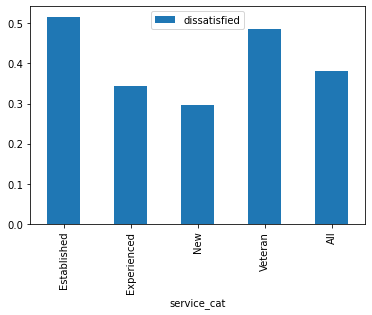

In [34]:
# create a visualization
pv_sat_serv.plot(kind = 'bar')

As a reminder - below are the questions this analysis was tasked with answering. 
* Are employees who worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there for longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

We can now answer the first question. Overall, there is a high rate of leaving due to dissatisfaction regardless of length of tenure, 38% overall. Looking at the data, we can see that as experience level increases, the attributable reason for a person leaving as a result of dissatisfaction increases. The chart above does not take into account volume, of which there is a higher volume of newer employees leaving. Causes and remedies for employee dissatisfaction may be worthwhile for management to explore. 

## Analysis of Age Group and Satisfaction Columns
### Cleaning the Age Column

In [35]:
# evaluate series
combined_up['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [36]:
# convert series to string
combined_up['age']=combined_up['age'].astype(str)

# replace double spaces with dashes 
combined_up['age']=combined_up['age'].str.replace("  ","-")

# check that definitions combined
combined_up['age'].value_counts(dropna=False)

41-45            93
46-50            81
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [37]:
# create one definition for people 56+
combined_up['age'] = combined_up['age'].str.replace("56-60",'56 or older').str.replace('61 or older','56 or older')

# confirm definitions combined
combined_up['age'].value_counts(dropna=False)

41-45            93
46-50            81
56 or older      78
36-40            73
51-55            71
26-30            67
21-25            62
31-35            61
nan              55
20 or younger    10
Name: age, dtype: int64

In [38]:
# split values on hyphen and keep the left 
combined_up['age']=combined_up['age'].str.split('-').str.get(0)

# confirm new name
combined_up['age'].value_counts(dropna=False)

41               93
46               81
56 or older      78
36               73
51               71
26               67
21               62
31               61
nan              55
20 or younger    10
Name: age, dtype: int64

In [39]:
# create booleans for 56+ and 20-
young_bool = r' or younger'
old_bool = r' or older'

# use booleans to remove the undesirable substrings 
combined_up['age'] = combined_up['age'].str.replace(young_bool,'').str.replace(old_bool,'').str.strip()

# convert everything to string
combined_up['age'] = combined_up['age'].astype(float)

# confirm that data is ready
combined_up['age'].value_counts(dropna=False).sort_index(ascending=True)

20.0    10
21.0    62
26.0    67
31.0    61
36.0    73
41.0    93
46.0    81
51.0    71
56.0    78
NaN     55
Name: age, dtype: int64

In [40]:
# create a copy to avoid errors
comb_up = combined_up.copy()

Above we cleaned the age column so that there is consistency and greater analytic capability. Next we will want to create age groups so that we can better understand trends across age groups. We will use the below definitions for our groupings. 

* Gen Z : 25 and younger
* Millenials : 26 - 40
* Gen X : 41 - 55
* Baby Boomers : 56 and older

In [41]:
# create categorization function
def age_group(element):
    if pd.isnull(element):
        return np.nan
    elif element < 26:
        return 'Gen Z'
    elif element <= 40:
        return 'Millenials'
    elif element <= 55:
        return 'Gen X'
    else:
        return 'Baby Boomers'
    
# create new column by applying categorization function
comb_up['age_group'] = comb_up['age'].apply(age_group)

comb_up['age_group'].value_counts(dropna=False)

Gen X           245
Millenials      201
Baby Boomers     78
Gen Z            72
NaN              55
Name: age_group, dtype: int64

We now have a new series that we can use to create another pivot table.

### Analysis

In [42]:
pv_age_sat = comb_up.pivot_table(index = 'age_group', values = 'dissatisfied', aggfunc = np.mean, dropna=False)
print(pv_age_sat)

              dissatisfied
age_group                 
Baby Boomers      0.423077
Gen X             0.391837
Gen Z             0.291667
Millenials        0.378109


<AxesSubplot:xlabel='age_group'>

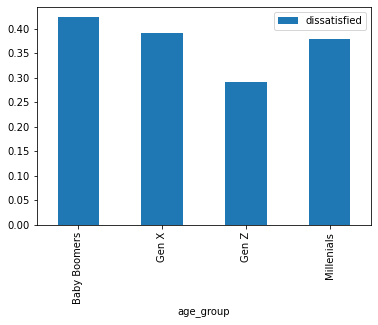

In [43]:
pv_age_sat.plot(kind='bar')

We can see that older generation employees who leave, tend to have a higher incidence of leaving as a result of some sort of dissatisfaction. This is True for Millenials, Gen X, and Baby Boomers. When Gen Z leaves the workplace, they have a ~10% reduction in the cause being some sort of dissatisfaction.

## Conclusion
Through this analysis we discovered that employees have a high overall incidence of leaving due to some dissatisfaction in the workplace, around 38% of all cases leave with dissatisfaction being at least a contributing factor in their decision. 

When we look at length of time that employees were with the organization, we see that highly experienced and veteran level employees, when they do decide to leave, have a higher tendency to leave due to some degree of dissatisfaction, an additional 16-20%, when compared with their new and experienced counterparts. 

Looking at age groups, Baby Boomers, Gen X, and Millenials had a comparable workplace dissatisfaction causalities, however Gen Z was ~10% less likely than these groups to name workplace dissatisfaction as a contributing factor towards their departure.